In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/User/OneDrive/Desktop/Data Analyst/Give Life_ Predict Blood Donations/datasets/transfusion.data"

In [3]:
transfusion = pd.read_csv("C:/Users/User/OneDrive/Desktop/Data Analyst/Give Life_ Predict Blood Donations/datasets/transfusion.data", delimiter=",")

In [4]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
transfusion.rename(columns={'whether he/she donated blood in March 2007' : 'Target'}, inplace = True)

In [7]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [8]:
transfusion['Target'].value_counts()

Target
0    570
1    178
Name: count, dtype: int64

In [9]:
transfusion['Target'].value_counts(normalize=True).round(3)

Target
0    0.762
1    0.238
Name: proportion, dtype: float64

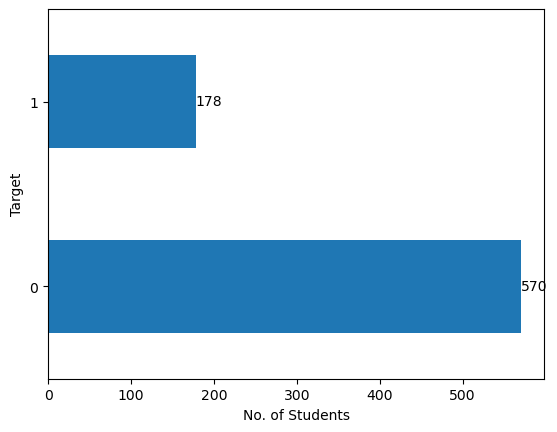

In [10]:
ax = transfusion['Target'].value_counts().plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('No. of Students')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df = pd.DataFrame(transfusion)
y = df['Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(transfusion.drop(columns='Target'),
    transfusion.Target, test_size=0.25, random_state=42, stratify=y)

In [14]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [15]:
import sklearn
print(sklearn.__version__)

1.5.2


In [16]:
pip show tpot

Name: TPOT
Version: 0.12.2
Summary: Tree-based Pipeline Optimization Tool
Home-page: https://github.com/EpistasisLab/tpot
Author: Randal S. Olson
Author-email: rso@randalolson.com
License: GNU/LGPLv3
Location: C:\Users\User\anaconda3\Lib\site-packages
Requires: deap, joblib, numpy, pandas, scikit-learn, scipy, stopit, tqdm, update-checker, xgboost
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [17]:
from tpot import TPOTClassifier, TPOTRegressor 

C:\Users\User\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [18]:
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7423330644124079

Best pipeline: LogisticRegression(input_matrix, C=0.1, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])

In [21]:
print(f"AUC Score: {tpot_auc_score:.3f}")

AUC Score: 0.785


In [22]:
tpot.export('tpot_best_pipeline.py')

In [23]:
print('\nBest pipeline steps:')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {name}: {transform}')


Best pipeline steps:
1. logisticregression: LogisticRegression(C=0.1, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
variances = X_train.var().round(3)

In [26]:
print(variances)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64


In [27]:
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()
col_to_normalize = 'Monetary (c.c. blood)'

In [28]:
for df_ in [X_train_normed, X_test_normed]:
    df_['Monetary(c.c. blood)'] = np.log1p(df_[col_to_normalize])
    df_.drop(columns=col_to_normalize, inplace=True)

In [29]:
variances1 = X_train_normed.var().round(3)

In [30]:
print(variances1)

Recency (months)         66.929
Frequency (times)        33.830
Time (months)           611.147
Monetary(c.c. blood)      0.835
dtype: float64


In [31]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

In [32]:
logreg.fit(X_train_normed, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [33]:
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.3f}')


AUC score: 0.789


In [34]:
from operator import itemgetter

In [35]:
sorted_models = sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)], 
    key=itemgetter(1),  # Sort by the second element in the tuple (AUC score)
    reverse=True)        # Sort in descending order

In [36]:
print("Sorted models by AUC score (highest to lowest):")
for model, score in sorted_models:
    print(f"{model}: {score:.4f}")

Sorted models by AUC score (highest to lowest):
logreg: 0.7891
tpot: 0.7853


In [37]:
correlation_matrix = X_train_normed.corr()

In [38]:
print("Correlation Matrix")
print(correlation_matrix.to_string())

Correlation Matrix
                      Recency (months)  Frequency (times)  Time (months)  Monetary(c.c. blood)
Recency (months)              1.000000          -0.178063       0.177298             -0.201116
Frequency (times)            -0.178063           1.000000       0.628682              0.848354
Time (months)                 0.177298           0.628682       1.000000              0.698886
Monetary(c.c. blood)         -0.201116           0.848354       0.698886              1.000000


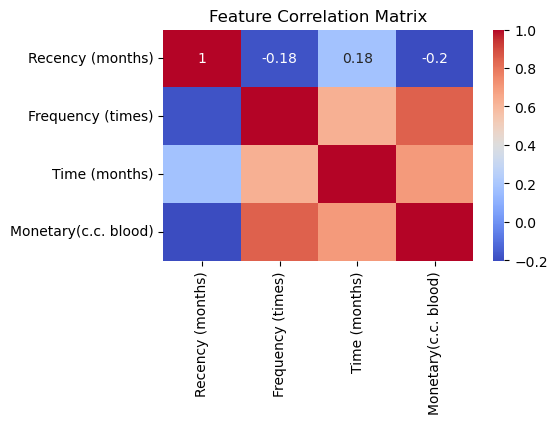

In [39]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.transform(X_test)

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train_normed, y_train)

y_pred = logreg.predict(X_test_normed)

Confusion Matrix:
 [[140   3]
 [ 40   4]]


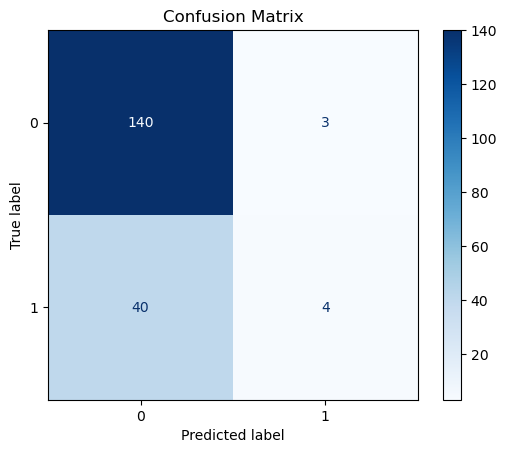

In [43]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12296\854640554.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual", shade=True)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_12296\854640554.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted", shade=True)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

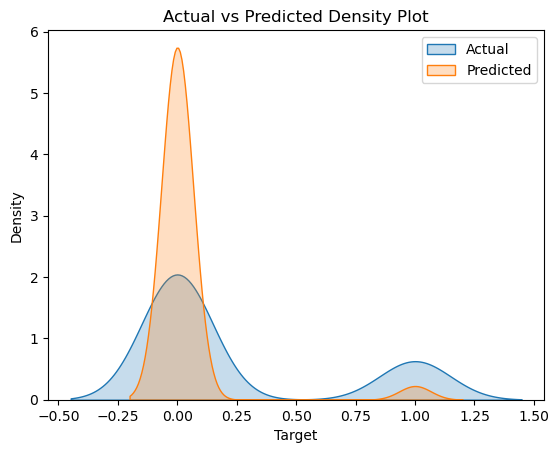

In [44]:
sns.kdeplot(y_test, label="Actual", shade=True)
sns.kdeplot(y_pred, label="Predicted", shade=True)
plt.legend()
plt.title("Actual vs Predicted Density Plot")
plt.show()

In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       143
           1       0.57      0.09      0.16        44

    accuracy                           0.77       187
   macro avg       0.67      0.53      0.51       187
weighted avg       0.73      0.77      0.70       187



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


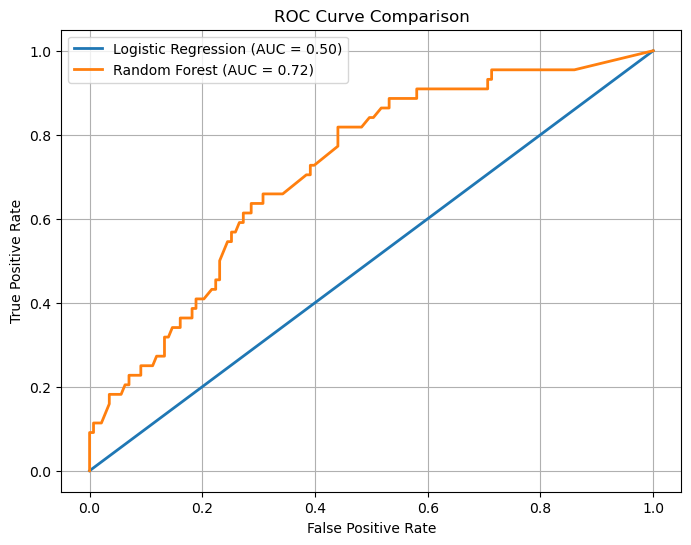

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]  # Probabilities for positive class
y_proba_rf = rf.predict_proba(X_test)[:, 1]          # Probabilities for positive class

# Calculate ROC data for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Calculate AUC scores
auc_logreg = roc_auc_score(y_test, y_proba_logreg)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linewidth=2)
#plt.plot([0, 1], [0, 1], "k--", label="Random Guess", linewidth=1)  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

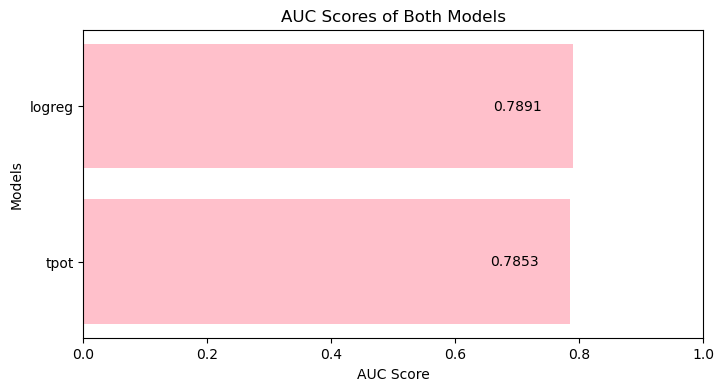

In [53]:
import matplotlib.pyplot as plt

# Example sorted model data
sorted_models = [("logreg", 0.7891), ("tpot", 0.7853)]

# Extract model names and scores
models = [model for model, score in sorted_models]
scores = [score for model, score in sorted_models]

# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(models, scores, color='pink')
plt.xlabel("AUC Score")
plt.ylabel("Models")
plt.title("AUC Scores of Both Models")
plt.xlim(0, 1)  # AUC scores are between 0 and 1
for i, score in enumerate(scores):
    plt.text(score - 0.05, i, f"{score:.4f}", va="center", ha="right", fontsize=10, color="black")
plt.gca().invert_yaxis()  # Reverse order to match "highest to lowest"
#plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()